tgb - 1/8/2020 - Figures 1 and 2 from reduced data

# 0) Imports and Utilities

In [1]:
# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve
import util.pdf as PDF

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import matplotlib.transforms as mtransforms
import datetime
from skimage import measure
from scipy import ndimage, stats
import scipy.integrate as sin
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter1d
import random
import pandas as pd

import pickle

In [2]:
# Figure characteristics common to all Figures
fz = 15
lw = 3
siz = 10

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['lines.markersize'] = siz
plt.close('all')

# Physical constants
stday = 24*3600

In [7]:
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'

In [3]:
class Bunch(object):
  
    def __init__(self, adict):
        self.__dict__.update(adict)

In [4]:
def edgTObin(edges):
    return 0.5*(edges[1:]+edges[:-1])

In [5]:
def get_all_values(dic_values):
    values = []
    for i_k, key in enumerate(dic_values.keys()):
        values.extend(dic_values[key])
    return values

In [6]:
def find_index(time_A, time_cond):
    ind = np.where(time_A == time_cond)[0][0]
    return ind

# 1) Figure 1

In [8]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_COSMO_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1a = Bunch(S)

In [9]:
# Load reduced data into dictionary S
path = pathPKL+'2019_11_19_Fig1a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1c = Bunch(S)

In [10]:
# Load reduced data into dictionary S
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path = pathPKL+'2020_01_08_ERA5_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1b = Bunch(S)

In [11]:
# Load reduced data into dictionary S
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path = pathPKL+'2020_01_08_ERA5_PDF.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1d = Bunch(S)

In [14]:
switch_kde = False
method = 'KDE' if switch_kde else 'PDF'

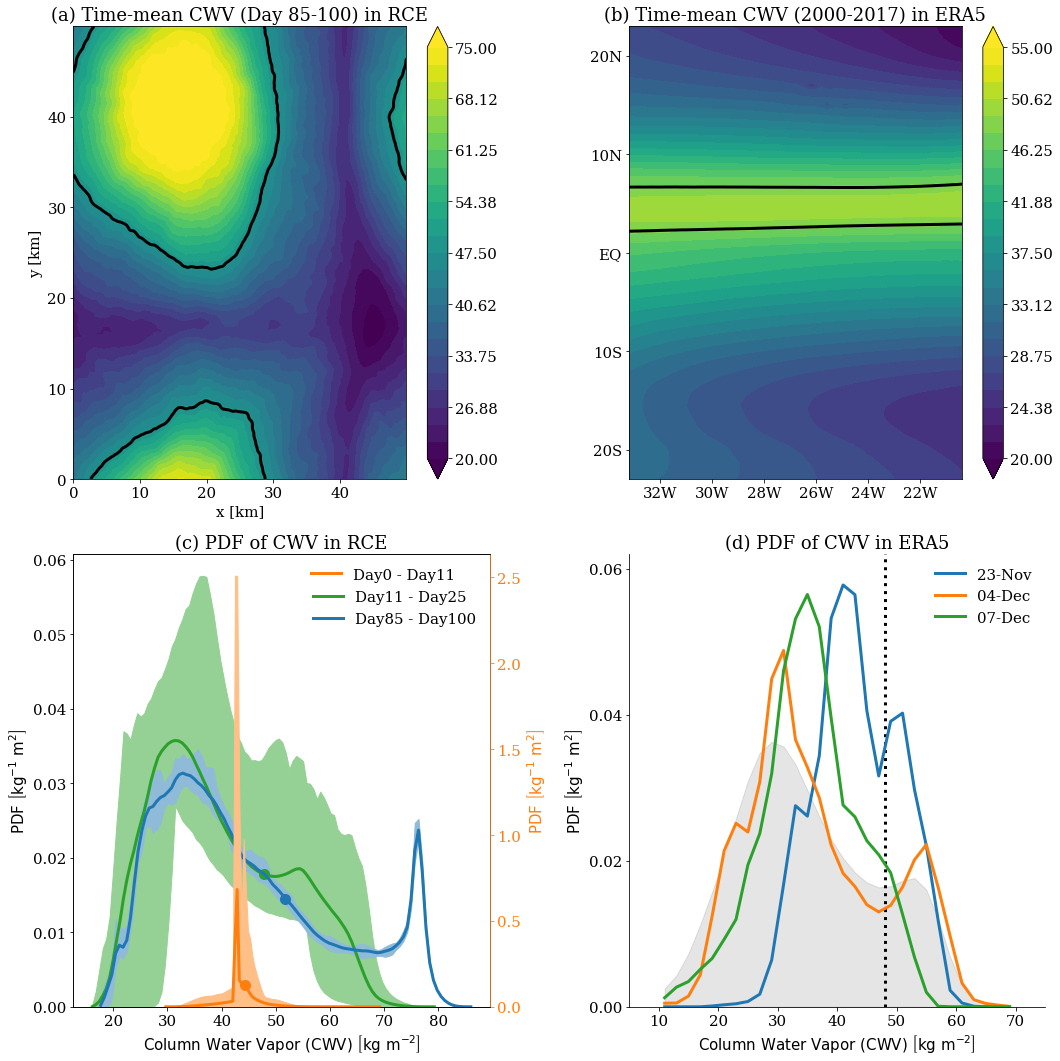

In [18]:
### Figure 1a
fig,ax0 = plt.subplots(2,2,figsize=(15,15))

ax = ax0[0][0]
ax.contour(F1a.x,F1a.y,F1a.toplot,[48.00],colors='k')
cont_levels = np.linspace(20,75,25)
im = ax.contourf(F1a.x, F1a.y, F1a.toplot, cont_levels, vmin = 20, vmax = 75, extend='both')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('(a) Time-mean CWV (Day 85-100) in RCE')
cbar = fig.colorbar(im,ax=ax)

### Figure 1c
ax = ax0[1][0]
ax2 = ax.twinx()

# Shading goes in the back
ax2.fill_between(edgTObin(F1c.SPINedges),F1c.SPIN_min,F1c.SPIN_max,color=1-(1-F1c.SPINrgb)/2)
ax.fill_between(edgTObin(F1c.COALedges),F1c.COAL_min,F1c.COAL_max,color=1-(1-F1c.COALrgb)/2)
ax.fill_between(edgTObin(F1c.COARedges),F1c.COAR_min,F1c.COAR_max,color=1-(1-F1c.COARrgb)/2)

# Right axis = Day 11-100
SPINline = ax2.plot(edgTObin(F1c.SPINedges),F1c.CWV_PDF_SPIN,color=F1c.SPINrgb,label='Day0 - Day11')
# Add dots to indicate mean value of percentile chosen for MMLi
ax2.scatter(x=F1c.SPIN_P48_mean,y=np.interp(x=F1c.SPIN_P48_mean,xp=edgTObin(F1c.SPINedges),fp=F1c.CWV_PDF_SPIN),color=F1c.SPINrgb)

ax2.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',color=F1c.SPINrgb)
ax2.spines['right'].set_color(F1c.SPINrgb)
ax2.tick_params(axis='y', colors=F1c.SPINrgb)
ax2.set_ylim((0,ax2.get_ylim()[1]))
leg2 = ax2.legend(frameon=False,bbox_to_anchor=(0,0,0.95,1))

# Left axis = Day0-Day11
COALline = ax.plot(edgTObin(F1c.COALedges),F1c.CWV_PDF_COAL,color=F1c.COALrgb,label='Day11 - Day25')
COARline = ax.plot(edgTObin(F1c.COARedges),F1c.CWV_PDF_COAR,color=F1c.COARrgb,label='Day85 - Day100')
# Add dots to indicate mean value of percentile chosen for MMLi
ax.scatter(x=F1c.COAL_P48_mean,y=np.interp(x=F1c.COAL_P48_mean,xp=edgTObin(F1c.COALedges),fp=F1c.CWV_PDF_COAL),color=F1c.COALrgb)
ax.scatter(x=F1c.COAR_P48_mean,y=np.interp(x=F1c.COAR_P48_mean,xp=edgTObin(F1c.COARedges),fp=F1c.CWV_PDF_COAR),color=F1c.COARrgb)

leg = ax.legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((0,ax.get_ylim()[1]))
ax.set_title('(c) PDF of CWV in RCE')

### Figure 1b
# Multi-year mean of CWV 
axes = ax0[0][1]

axes.contour(F1b.lon,F1b.lat,F1b.toplot, [48.00], colors=['k'])#, vmin = 2.7e9, vmax=2.85e9)
cont_levels = np.linspace(20,55,25)
im = axes.contourf(F1b.lon,F1b.lat,F1b.toplot, cont_levels, vmin = 20, vmax = 55, extend='both')

locs = axes.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%iW'%int(360-loc)
axes.set_xticklabels(labels) 

locs = axes.get_yticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    if loc >0:
        labels[i_l] = '%iN'%int(loc)
    elif loc == 0:
        labels[i_l] = 'EQ'
    else:
        labels[i_l] = '%iS'%int(loc*-1)
axes.set_yticklabels(labels)
axes.set_title('(b) Time-mean CWV (2000-2017) in ERA5')

cbar = fig.colorbar(im,ax=axes)

### Figure 1d

ax = ax0[1][1]
x = np.linspace(10,75,161)

for i, time in enumerate(F1d.times_A):

    tmp = np.squeeze(F1d.CWV.sel({'time':slice(time-np.timedelta64(12,'h'),
                                               time+np.timedelta64(12,'h'))}).values) #np.squeeze(PWAtl.sel({'time':time}).values) #
    
    if switch_kde:
        density = stats.gaussian_kde(np.ndarray.flatten(tmp))
        ax.plot(x, density(x), label = pd.to_datetime(time).strftime("%d-%b"), color = F1d.col_A[i])
    else:
        hist, edges = np.histogram(np.ndarray.flatten(tmp), density = True, bins = F1d.xbins)
        ax.plot(edgTObin(edges), hist, label = pd.to_datetime(time).strftime("%d-%b"), color = F1d.col_A[i])
    
    ax.legend(frameon=False)
    
ax.fill_between(edgTObin(F1d.edges),F1d.hist_total, color = 'k',label='85d-100d', alpha = 0.1)
    
ymin, ymax = plt.ylim()
ax.vlines([48], 0.0, ymax, linestyle=':')
ax.set_ylim(0.0, 0.062)
ax.set_yticks([0.0, 0.02, 0.04, 0.06])
ax.set_xlim(F1d.xbins[0]-5, F1d.xbins[-1]+5)

ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{%s\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$'%method)
ax.set_title('(d) PDF of CWV in ERA5')

#ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
plt.tight_layout()

# Save figure
path_home = '/users/tbeucler/'
plt.savefig(path_home+'Fig1.pdf',format='pdf')

# 2) Figure 2